In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

## Loading the Data

In [2]:
# Loading the Data
df = pd.read_csv('train.csv', index_col=False,delimiter=';')

test = pd.read_csv("test.csv")

print("Shape :",df.shape)
print("Describe :",df.describe())
print("Null_values :",df.isnull().sum())
df.head(5)

Shape : (4521, 17)
Describe :                age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Feature Selection

In [3]:
# Converting Categorical to numerical
df["marital"]=df["marital"].map({'single':0, 'married':1, 'divorced':2})
df["default"]=df["default"].map({'no':0, 'yes':1})
df["housing"]=df["housing"].map({'no':0, 'yes':1})
df["loan"]=df["loan"].map({'no':0, 'yes':1})


df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,1,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,management,0,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,management,1,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,1,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
# Calculating 'unknown' values in poutcome
df['poutcome'].replace({'unknown': None},inplace =True, regex= True)
print(df['poutcome'].unique())

df.head()


[None 'failure' 'other' 'success']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,None,no
1,33,services,1,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,management,0,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,management,1,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,None,no
4,59,blue-collar,1,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,None,no


In [5]:
df['poutcome'].unique()


array([None, 'failure', 'other', 'success'], dtype=object)

In [6]:
df["education"]=df["education"].map({'primary':0, 'secondary':1, 'tertiary':2,'unknown':3})
df["poutcome"]=df["poutcome"].map({'None':0, 'failure':1, 'other':2,'success':3})

In [7]:
# using one hot encoder for nominal data in job feature
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
ohe = OneHotEncoder()
# df[list(df["job"].unique())] = ohe.fit_transform(df[["job"]]).A
# df.drop("job",axis = 1, inplace = True)

In [8]:
label = LabelEncoder()
df["y"] =  label.fit_transform(df["y"])

In [9]:
df.drop("contact", inplace = True, axis = 1)
df.drop("month", inplace = True, axis = 1)

In [10]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,age,marital,education,default,balance,housing,loan,day,duration,campaign,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,30,1,0,0,1787,0,0,19,79,1,...,0,0,0,0,0,0,0,0,1,0
1,33,1,1,0,4789,1,1,11,220,1,...,0,0,0,0,0,1,0,0,0,0
2,35,0,2,0,1350,1,0,16,185,1,...,0,0,1,0,0,0,0,0,0,0
3,30,1,2,0,1476,1,1,3,199,4,...,0,0,1,0,0,0,0,0,0,0
4,59,1,1,0,0,1,0,5,226,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df.head()


,age,marital,education,default,balance,housing,loan,day,duration,campaign,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,30,1,0,0,1787,0,0,19,79,1,...,0,0,0,0,0,0,0,0,1,0
1,33,1,1,0,4789,1,1,11,220,1,...,0,0,0,0,0,1,0,0,0,0
2,35,0,2,0,1350,1,0,16,185,1,...,0,0,1,0,0,0,0,0,0,0
3,30,1,2,0,1476,1,1,3,199,4,...,0,0,1,0,0,0,0,0,0,0
4,59,1,1,0,0,1,0,5,226,1,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df.describe()

,age,marital,education,default,balance,housing,loan,day,duration,campaign,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,...,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,0.852245,1.231365,0.016810,1422.657819,0.566025,0.152842,15.915284,263.961292,2.793630,...,0.037160,0.024773,0.214333,0.050874,0.040478,0.092236,0.018580,0.169874,0.028312,0.008405
std,10.576211,0.599650,0.748744,0.128575,3009.638142,0.495676,0.359875,8.247667,259.856633,3.109807,...,0.189174,0.155451,0.410404,0.219764,0.197099,0.289391,0.135051,0.375564,0.165882,0.091304
min,19.000000,0.000000,0.000000,0.000000,-3313.000000,0.000000,0.000000,1.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,1.000000,0.000000,69.000000,0.000000,0.000000,9.000000,104.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,1.000000,0.000000,444.000000,1.000000,0.000000,16.000000,185.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,1.000000,2.000000,0.000000,1480.000000,1.000000,0.000000,21.000000,329.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,87.000000,2.000000,3.000000,1.000000,71188.000000,1.000000,1.000000,31.000000,3025.000000,50.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[[ 'age', 'marital','education','default', 'balance', 'housing', 'loan',
       'duration', 'campaign','pdays','previous']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,7.632120,age
1,3.613112,marital
2,3.067286,education
3,1.025674,default
4,1.253320,balance
5,2.088233,housing
6,1.183965,loan
7,1.956370,duration
8,1.764992,campaign
9,1.769720,pdays


From the vif we can see that all the features are significant except age

In [14]:
df

,age,marital,education,default,balance,housing,loan,day,duration,campaign,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,30,1,0,0,1787,0,0,19,79,1,...,0,0,0,0,0,0,0,0,1,0
1,33,1,1,0,4789,1,1,11,220,1,...,0,0,0,0,0,1,0,0,0,0
2,35,0,2,0,1350,1,0,16,185,1,...,0,0,1,0,0,0,0,0,0,0
3,30,1,2,0,1476,1,1,3,199,4,...,0,0,1,0,0,0,0,0,0,0
4,59,1,1,0,0,1,0,5,226,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,1,1,0,-333,1,0,30,329,5,...,0,0,0,0,0,1,0,0,0,0
4517,57,1,2,1,-3313,1,1,9,153,1,...,0,0,0,0,1,0,0,0,0,0
4518,57,1,1,0,295,0,0,19,151,11,...,0,0,0,0,0,0,0,1,0,0
4519,28,1,1,0,1137,0,0,6,129,4,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df.columns

Index(['age', 'marital', 'education', 'default', 'balance', 'housing', 'loan',
       'day', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown'],
      dtype='object')

In [16]:
df.isna().sum()

age                     0
marital                 0
education               0
default                 0
balance                 0
housing                 0
loan                    0
day                     0
duration                0
campaign                0
pdays                   0
previous                0
poutcome             3705
y                       0
job_blue-collar         0
job_entrepreneur        0
job_housemaid           0
job_management          0
job_retired             0
job_self-employed       0
job_services            0
job_student             0
job_technician          0
job_unemployed          0
job_unknown             0
dtype: int64

### Split the data into train and test set to avoid overfitting

In [17]:
x = df[['age', 'education', 'default', 'balance', 'housing', 'loan',
       'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown'
       ]]
y = df['y']

In [18]:

from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=3)

In [19]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)

## Logistic Regression Model

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

LR_model = LogisticRegression(C=0.05, solver="liblinear").fit(X_train_scaled,y_train)
y_pred= LR_model.predict(X_test)

# Calculate metrics
metrics = {'Accuracy': accuracy_score(y_test, y_pred),
           'Precision': precision_score(y_test, y_pred),
           'Recall': recall_score(y_test, y_pred),
           'F1-score': f1_score(y_test, y_pred),
           'AUC-ROC': roc_auc_score(y_test, y_pred)}

eval_metrics = pd.DataFrame([metrics], columns=metrics.keys())
eval_metrics

/Users/deepshikhar/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,Accuracy,Precision,Recall,F1-score,AUC-ROC
0,0.115696,0.115044,1.0,0.206349,0.500416


## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

RF_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = RF_model.predict(X_test)

# Calculate metrics
metrics = {'Accuracy': accuracy_score(y_test, y_pred),
           'Precision': precision_score(y_test, y_pred),
           'Recall': recall_score(y_test, y_pred),
           'F1-score': f1_score(y_test, y_pred),
           'AUC-ROC': roc_auc_score(y_test, y_pred)}

eval_metrics = pd.DataFrame([metrics], columns=metrics.keys())
eval_metrics


,Accuracy,Precision,Recall,F1-score,AUC-ROC
0,0.883567,0.485294,0.211538,0.294643,0.591198


## Gradient boost

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

GB_model = GradientBoostingClassifier().fit(X_train, y_train)
y_pred = GB_model.predict(X_test)

# Calculate metrics
metrics = {'Accuracy': accuracy_score(y_test, y_pred),
           'Precision': precision_score(y_test, y_pred),
           'Recall': recall_score(y_test, y_pred),
           'F1-score': f1_score(y_test, y_pred),
           'AUC-ROC': roc_auc_score(y_test, y_pred)}

eval_metrics = pd.DataFrame([metrics], columns=metrics.keys())
eval_metrics


,Accuracy,Precision,Recall,F1-score,AUC-ROC
0,0.884304,0.494737,0.301282,0.374502,0.630658


## Hyperparameter Tunning

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the gradient boosting classifier
gbc = GradientBoostingClassifier()

param_grid = {'n_estimators': [100,200, 300],
           'learning_rate': [0.001, 0.01, 0.1, 1],
           'max_depth': [3, 4, 6, 7],
         }


# Create the grid search object
grid_search = GridSearchCV(gbc, param_grid, cv=5,
                           scoring='accuracy', return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200}
Best cross-validation score: 0.88


In [24]:
# Logistic Regression Grid Search

LR_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
           'penalty': ['l1', 'l2'],
           'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
           'max_iter': [100, 200, 300, 400, 500],
           'tol': [1e-4, 1e-3, 1e-2, 1e-1]}


# Initialize the GridSearchCV object
LR_grid_search = GridSearchCV(LogisticRegression(), LR_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
LR_grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: {}".format(LR_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(LR_grid_search.best_score_))

/Users/deepshikhar/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/deepshikhar/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/deepshikhar/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/deepshikhar/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/deepshikhar/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

In [ ]:
# Random Forest Grid Search

RF_grid = {'n_estimators': [100, 200, 300, 400, 500],
           'max_depth': [3, 4, 5, 6, 7],
           'min_samples_split': [2, 3, 4, 5],
           'min_samples_leaf': [1, 2, 3, 4, 5]}

# Initialize the GridSearchCV object
RF_grid_search = GridSearchCV(RandomForestClassifier(), RF_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
RF_grid_search.fit(X_train, y_train)

# Get the best hyperparameters
RF_best_params = RF_grid_search.best_params_

# Print the best parameters and best score
print("Best parameters: {}".format(RF_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(RF_grid_search.best_score_))

## Plotting Learning Curves

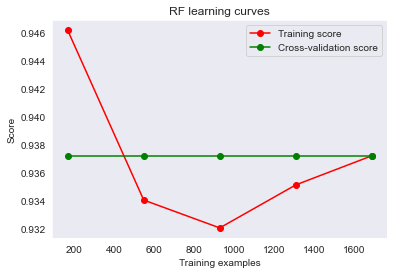

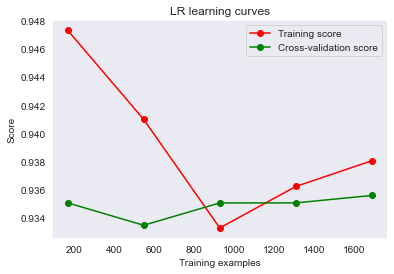

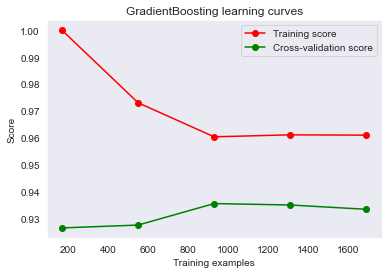

In [ ]:
from sklearn.model_selection import learning_curve
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(RF_grid_search.best_estimator_,"RF learning curves",X_train,y_train,cv=10)
g = plot_learning_curve(LR_grid_search.best_estimator_,"LR learning curves",X_train,y_train,cv=10)
g = plot_learning_curve(grid_search.best_estimator_,"GradientBoosting learning curves",X_train,y_train,cv=10)


In [ ]:
# Define the gradient boosting classifier
gbc = GradientBoostingClassifier(learning_rate= 0.01, max_depth= 4, n_estimators= 300)

# Fit the grid search to the data
gbc.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=300)

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_curve,classification_report,roc_curve, confusion_matrix
y_pred = gbc.predict(X_test)
acc_train = accuracy_score(y_test,y_pred)
class_re = classification_report(y_test,y_pred)
con_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",con_mat)
print("\n")
print("The accuracy of the model:",(acc_train)*100)
print("\n")
print("The classification report:\n",class_re)


Confusion Matrix:
 [[863  15]
 [ 42   5]]


The accuracy of the model: 93.83783783783784


The classification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       878
           1       0.25      0.11      0.15        47

    accuracy                           0.94       925
   macro avg       0.60      0.54      0.56       925
weighted avg       0.92      0.94      0.93       925



In [ ]:
roc_auc_score(y_test,y_pred)

0.5446493481316338

In [ ]:
lr = LogisticRegression(C= 1, max_iter= 100, penalty= 'l2', solver= 'sag', tol= 0.1)

# Fit the grid search to the data
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
acc_train = accuracy_score(y_test,y_pred)
class_re = classification_report(y_test,y_pred)
con_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",con_mat)
print("\n")
print("The accuracy of the model:",(acc_train)*100)
print("\n")
print("The classification report:\n",class_re)

Confusion Matrix:
 [[869   9]
 [ 45   2]]


The accuracy of the model: 94.16216216216216


The classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       878
           1       0.18      0.04      0.07        47

    accuracy                           0.94       925
   macro avg       0.57      0.52      0.52       925
weighted avg       0.91      0.94      0.92       925



In [ ]:
roc_auc_score(y_test,y_pred)

0.5161513110066398

In [ ]:
rf = RandomForestClassifier(max_depth= 3, n_estimators= 100,min_samples_leaf = 1, min_samples_split = 2)

# Fit the grid search to the data
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
acc_train = accuracy_score(y_test,y_pred)
class_re = classification_report(y_test,y_pred)
con_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",con_mat)
print("\n")
print("The accuracy of the model:",(acc_train)*100)
print("\n")
print("The classification report:\n",class_re)

Confusion Matrix:
 [[878   0]
 [ 47   0]]


The accuracy of the model: 94.91891891891892


The classification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       878
           1       0.00      0.00      0.00        47

    accuracy                           0.95       925
   macro avg       0.47      0.50      0.49       925
weighted avg       0.90      0.95      0.92       925



/Users/deepshikhar/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/deepshikhar/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/deepshikhar/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [ ]:
roc_auc_score(y_test,y_pred)

0.5

### From the above result we can observe that Gradient Boosting Algorithm works best while rest to try to overfit the data

## Test the Model on Test Set


In [ ]:
test_dummies = test.copy()
test_dummies.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown
1,2,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown
2,3,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown
3,4,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown
4,5,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown


In [ ]:
test_dummies["marital"]=test_dummies["marital"].map({'single':0, 'married':1, 'divorced':2})
test_dummies["default"]=test_dummies["default"].map({'no':0, 'yes':1})
test_dummies["housing"]=test_dummies["housing"].map({'no':0, 'yes':1})
test_dummies["loan"]=test_dummies["loan"].map({'no':0, 'yes':1})

test_dummies = pd.get_dummies(test_dummies,drop_first=True)


In [ ]:
# Scale the data

# select the columns that are dummy variables
dummy_vars = test_dummies.loc[:, test_dummies.columns.str.startswith(('Id','job_', 'education_'))]

# # select the columns that are not dummy variables
features = test_dummies.loc[:, ~test_dummies.columns.isin(dummy_vars.columns)]

# # scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# # concatenate the scaled features with the original dummy variables
test_scaled = pd.concat([pd.DataFrame(features_scaled, columns=features.columns), dummy_vars], axis=1)

In [ ]:
x_test = test_dummies[['age', 'marital', 'balance', 'housing', 'loan', 'day',
       'duration', 'campaign', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'education_secondary',
       'education_tertiary', 'education_unknown']]


### Testing using Gradient Boost Classifier

In [ ]:
predictions = gbc.predict(x_test)

# Creating dataframe of predictions
pred_report = pd.DataFrame(predictions.tolist(),index = [i for i in range(len(predictions))],columns=["client will subscribe a term deposit"])
pred_report.index.name = 'ID'

In [ ]:
# saving the prediction
pred_report.to_csv("final_submission.csv")